In [5]:
import torch
import os
from IPython.display import Image, clear_output  # to display images
import utils
display = utils.notebook_init()  # checks

fatal: cannot change to '/home/valentin/Documents/CV': No such file or directory
YOLOv5 🚀 2022-7-26 Python-3.10.4 torch-1.12.0+cu102 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4037MiB)


Setup complete ✅ (4 CPUs, 15.6 GB RAM, 300.6/456.9 GB disk)


In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
BOX_COLOR = (255, 0, 0) # Red

In [9]:
torch.cuda.get_device_name()

'NVIDIA GeForce GTX 1050 Ti'

# Проверка датасета

In [2]:
from PIL import Image, ImageDraw


def yolo_to_xml_bbox(bbox, w, h):
    # x_center, y_center width heigth
    w_half_len = (bbox[2] * w) / 2
    h_half_len = (bbox[3] * h) / 2
    xmin = int((bbox[0] * w) - w_half_len)
    ymin = int((bbox[1] * h) - h_half_len)
    xmax = int((bbox[0] * w) + w_half_len)
    ymax = int((bbox[1] * h) + h_half_len)
    return [xmin, ymin, xmax, ymax]


def draw_image(img, bboxes):
    draw = ImageDraw.Draw(img)
    for bbox in bboxes:
        draw.rectangle(bbox, outline="red", width=2)
    # img.save("example.jpg")
    img.show()


image_filename = "../../stanford_dogs/train/images/n02085620_199.jpg"
label_filename = "../../stanford_dogs/train/labels/n02085620_199.txt"
bboxes = []

img = Image.open(image_filename)

with open(label_filename, 'r', encoding='utf8') as f:
    for line in f:
        data = line.strip().split(' ')
        bbox = [float(x) for x in data[1:]]
        bboxes.append(yolo_to_xml_bbox(bbox, img.width, img.height))

draw_image(img, bboxes)

FileNotFoundError: [Errno 2] No such file or directory: '../../stanford_dogs/train/images/n02085620_199.jpg'

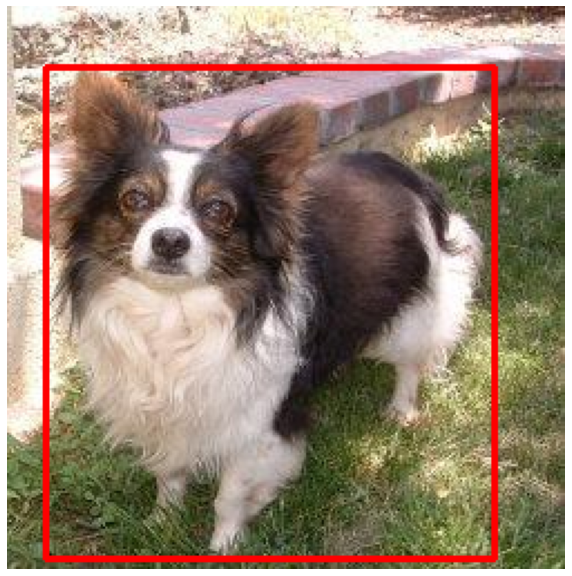

In [4]:
BOX_COLOR = (255, 0, 0) # Red


def visualize_bbox(img, bbox, color = BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, x_max, y_max = bbox
    # x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    #print(x_min, y_min, w, h)
   
    cv.rectangle(img, (x_min, y_max), (x_max, y_min), color,thickness)
    
    # ((text_width, text_height), _) = cv.getTextSize(class_name, cv.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    # cv.putText(
    #     img,
    #     text=class_name,
    #     org=(x_min, y_min - int(0.3 * text_height)),
    #     fontFace=cv.FONT_HERSHEY_SIMPLEX,
    #     fontScale=0.35, 
    #     color=TEXT_COLOR, 
    #     lineType=cv.LINE_AA,
    # )
    return img


def visualize_bboxes(image, bboxes):
    img = image.copy()
    for bbox in bboxes:
        img = visualize_bbox(img, bbox)
    plt.figure(figsize=(10, 15))
    plt.axis('off')
    plt.imshow(img)
    
def yolo_to_xml_bbox(bbox, w, h):
    # x_center, y_center width heigth
    w_half_len = (bbox[2] * w) / 2
    h_half_len = (bbox[3] * h) / 2
    xmin = int((bbox[0] * w) - w_half_len)
    ymin = int((bbox[1] * h) - h_half_len)
    xmax = int((bbox[0] * w) + w_half_len)
    ymax = int((bbox[1] * h) + h_half_len)
    return [xmin, ymin, xmax, ymax]


def draw_image(img, bboxes):
    draw = ImageDraw.Draw(img)
    for bbox in bboxes:
        draw.rectangle(bbox, outline="red", width=2)
    img.save("example.jpg")
    img.show()


image_filename = "../../stanford_dogs/train/images/n02086910_2556.jpg"
label_filename = "../../stanford_dogs/train/labels/n02086910_2556.txt"
bboxes = []

image = cv.imread(image_filename, cv.IMREAD_COLOR)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

with open(label_filename, 'r', encoding='utf8') as f:
    for line in f:
        data = line.strip().split(' ')
        bbox = [float(x) for x in data[1:]]
        bboxes.append(yolo_to_xml_bbox(bbox, image.shape[1], image.shape[0]))

visualize_bboxes(image, bboxes)

Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** Our dataset locaiton is saved in the `dataset.location`
- **weights:** specify a path to weights to start transfer learning from. Here we choose the generic COCO pretrained checkpoint.
- **cache:** cache images for faster training

In [6]:
!python3 train.py --img 400 --batch 16 --epochs 150 --data stanford_dogs.yaml --weights ./runs/train/exp6/weights/best.pt

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=./runs/train/exp6/weights/best.pt, cfg=, data=stanford_dogs.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=400, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 2 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
fatal: cannot change to '/home/valentin/Documents/CV': No 

In [10]:
!python3 train.py --img 400 --batch 25 --epochs 100 --data stanford_dogs.yaml --weights ./runs/train/exp8/weights/best.pt

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=./runs/train/exp8/weights/best.pt, cfg=, data=stanford_dogs.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=25, imgsz=400, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 8 (delta 3), reused 6 (delta 3), pack-reu

In [11]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [7]:
!python3 detect.py --weights best.pt --img 400 --source ../../stanford_dogs/test/images
# display.Image(filename='runs/detect/exp4/Valdemar1.jpg', width=600)

detect: weights=['best.pt'], source=../../stanford_dogs/test/images, data=data/coco128.yaml, imgsz=[400, 400], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
fatal: cannot change to '/home/valentin/Documents/CV': No such file or directory
YOLOv5 🚀 2022-7-20 Python-3.10.4 torch-1.12.0+cu102 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4037MiB)

Fusing layers... 
Model summary: 213 layers, 7333765 parameters, 0 gradients, 16.8 GFLOPs
image 1/411 /home/valentin/Documents/CV project/stanford_dogs/test/images/n02085620_1346.jpg: 320x416 Done. (0.009s)
image 2/411 /home/valentin/Documents/CV project/stanford_dogs/test/images/n02085620_5496.jpg: 288x416 1 Shetland_sheepdog, Done. (0.010s)
image 3/411 /home/valentin

In [17]:
# torch.hub.load('ultralytics/yolov5', 'custom', path_or_model='your.pt')

---

# Fine-tuning на собственном датасете

[0.44918, 0.346972, 0.037016, 0.091389]
[0.428922, 0.465896, 0.045719, 0.129625]


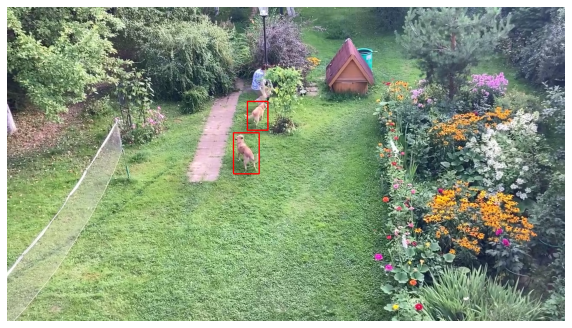

In [12]:
image_filename = "../../my_dogs_yolo/dataset-far/images/frame_001750_1.PNG"
label_filename = "../../my_dogs_yolo/dataset-far/labels/frame_001750_1.txt"
bboxes = []

image = cv.imread(image_filename, cv.IMREAD_COLOR)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

with open(label_filename, 'r', encoding='utf8') as f:
    for line in f:
        data = line.strip().split(' ')
        bbox = [float(x) for x in data[1:]]
        print(bbox)
        bboxes.append(yolo_to_xml_bbox(bbox, image.shape[1], image.shape[0]))

visualize_bboxes(image, bboxes)

In [1]:
!python3 train.py --img 600 --batch 12 --epochs 100 --data my_dogs.yaml --weights runs/train/exp13/weights/best.pt --cache

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=runs/train/exp13/weights/best.pt, cfg=, data=my_dogs.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=12, imgsz=600, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Command 'git fetch && git config --get remote.origin.url' timed out after 5 seconds
fatal: cannot change to '/home/valentin/Documents/CV': No such file or directory
YOLOv5 🚀 2022-7-26 Python-3

In [9]:
%reload_ext tensorboard
%tensorboard --logdir runs

Reusing TensorBoard on port 6006 (pid 8995), started 0:26:58 ago. (Use '!kill 8995' to kill it.)

In [44]:
!python3 detect.py --weights yolo5s-alphabeta.pt --img 400 --source ../../my_dogs_yolo/val/images/photo_2022-07-25_14-16-36.jpg

detect: weights=['yolo5s-alphabeta.pt'], source=../../my_dogs_yolo/val/images/photo_2022-07-25_14-16-36.jpg, data=data/coco128.yaml, imgsz=[400, 400], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
fatal: cannot change to '/home/valentin/Documents/CV': No such file or directory
YOLOv5 🚀 2022-7-26 Python-3.10.4 torch-1.12.0+cu102 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4037MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
/home/valentin/Documents/CV project/yolo5/yolov5/detect.py:137: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.ten

In [34]:
import torch
a = torch.tensor([[12,4],[15,4]])
if a[0,1]==a[1,1]:
    print('hey')
len(a)

hey


2